In [2]:
import cmocean as cmo
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import signal
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import xarray as xr

In [6]:
SVB = xr.open_dataset('curtain_SSH_SVB_AugTS.nc')
noSVB = xr.open_dataset('curtain_SSH_NoSVB_AugTS.nc')

In [7]:
def plot_spectrogram(timeseries, X, indices, colors, kind='linear', title='', xlim=[0,40]):
    sns.set_style('whitegrid')
    sns.set_context('notebook')

    samp_freq = 1/600 # 10 min data
    
    fig,(ax) = plt.subplots(1,1,figsize=(10,6))

    # Useful freq to period indicators
#     ax.axvline(1, color='k', alpha=0.3, linestyle='-') 
#     ax.axvline(5, color='k', alpha=0.3, linestyle='-') 
#     ax.axvline(8, color='k', alpha=0.3, linestyle='-') 
#     ax.axvline(11, color='k', alpha=0.3, linestyle='-') 
#     ax.axvline(17, color='k', alpha=0.3, linestyle='-') 

#     ax.text(1,1E-10,'1', fontweight='bold',fontsize=12)
#     ax.text(5,1E-9,'5', fontweight='bold',fontsize=12)
#     ax.text(8,1E-9,'8', fontweight='bold',fontsize=12)
#     ax.text(11,1E-10,'11', fontweight='bold',fontsize=12)
#     ax.text(17,1E-10,'17', fontweight='bold',fontsize=12)

    # cells along coast(ish)
    for kk,col in zip(indices,colors) :
        #freq_per, Pxx_den_per = signal.welch(timeseries[:,kk], samp_freq, detrend='constant')
        freq_per, Pxx_den_per = signal.periodogram(timeseries[:,kk], samp_freq, detrend='constant')
        
        if kind == 'semilog':
            ax.semilogy(freq_per*(86400), Pxx_den_per,'-',color=col, alpha=0.7, label='%1.1f km' %X[kk])
        elif kind=='linear':
            ax.plot(freq_per*(86400), Pxx_den_per,'-',color=col, alpha=0.7, label='%1.1f km' %X[kk])  
        else:
            raise Exception("%s is not a valid value for kind" %kind)
            
    ax.legend()
    ax.set_xlim(xlim)
    ax.set_ylabel('PSD')
    ax.set_xlabel('Frequency (cpd)')
    ax.set_title(title)
    return fig, ax

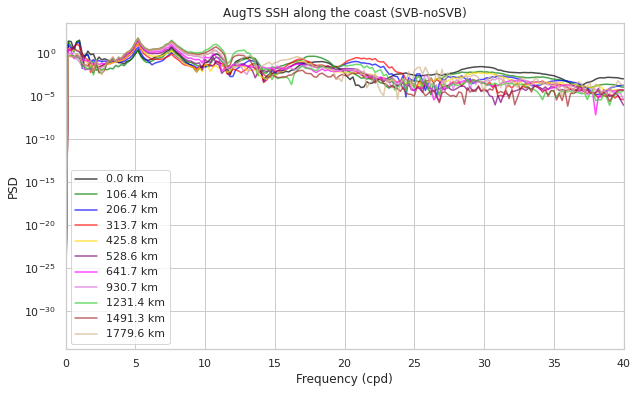

In [12]:
indices = [0,50,100,150,200,250,300,350,400,450,500]
colors = ['k', 'g','b','r','gold','purple','magenta','orchid','limegreen','brown','tan']
timeseries = (SVB.curtain_data.data-noSVB.curtain_data.data)*100
X = SVB.X[:]

kind = 'semilog'
title = 'AugTS SSH along the coast (SVB-noSVB)'
fig, ax = plot_spectrogram(timeseries,X, indices, colors, kind=kind, title=title)

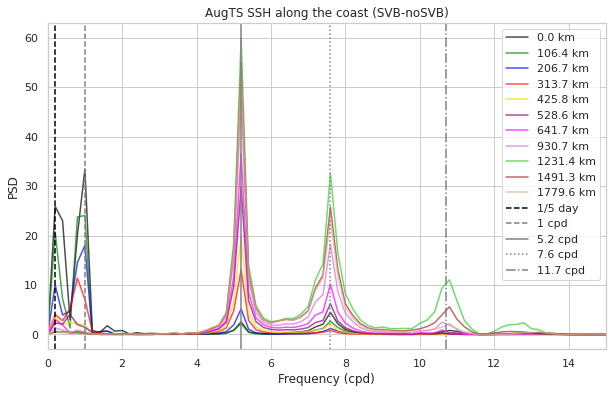

In [34]:
kind = 'linear'
title = 'AugTS SSH along the coast (SVB-noSVB)'
timeseries = (SVB.curtain_data.data-noSVB.curtain_data.data)*100
X = SVB.X[:]
fig, ax = plot_spectrogram(timeseries,X, indices, colors, 
                           kind=kind, title=title, xlim=[0,15])
ax.axvline(0.2, linestyle='--', color='k', label='1/5 day')
ax.axvline(1, linestyle='--', color='0.5', label='1 cpd')
ax.axvline(5.2, linestyle='-', color='0.5', label='5.2 cpd')
ax.axvline(7.6, linestyle=':', color='0.5', label='7.6 cpd')
ax.axvline(10.7, linestyle='-.', color='0.5', label='11.7 cpd')

ax.legend()

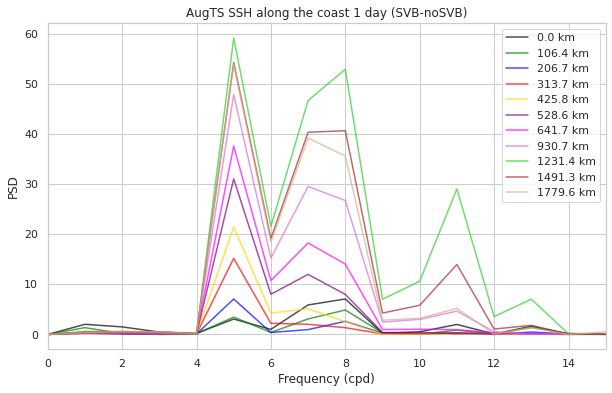

In [20]:
kind = 'linear'
title = 'AugTS SSH along the coast 1 day (SVB-noSVB)'
timeseries = (SVB.curtain_data.data-noSVB.curtain_data.data)*100
X = SVB.X[:]
fig, ax = plot_spectrogram(timeseries[:144,:],X, indices, colors, 
                           kind=kind, title=title,xlim=[0,15])

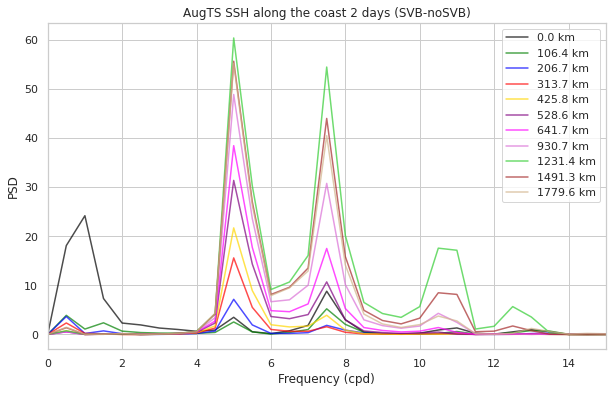

In [15]:
kind = 'linear'
title = 'AugTS SSH along the coast 2 days (SVB-noSVB)'
timeseries = (SVB.curtain_data.data-noSVB.curtain_data.data)*100
X = SVB.X[:]
fig, ax = plot_spectrogram(timeseries[:288,:],X, indices, colors, 
                           kind=kind, title=title, xlim=[0,15])

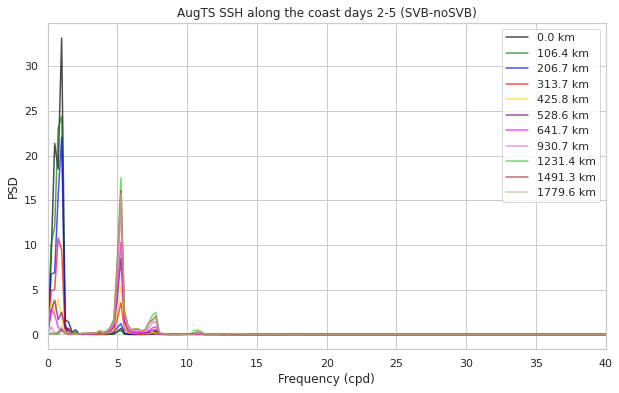

In [16]:
kind = 'linear'
title = 'AugTS SSH along the coast days 2-5 (SVB-noSVB)'
timeseries = (SVB.curtain_data.data-noSVB.curtain_data.data)*100
X = SVB.X[:]
fig, ax = plot_spectrogram(timeseries[144:,:],X, indices, colors, 
                           kind=kind, title=title)

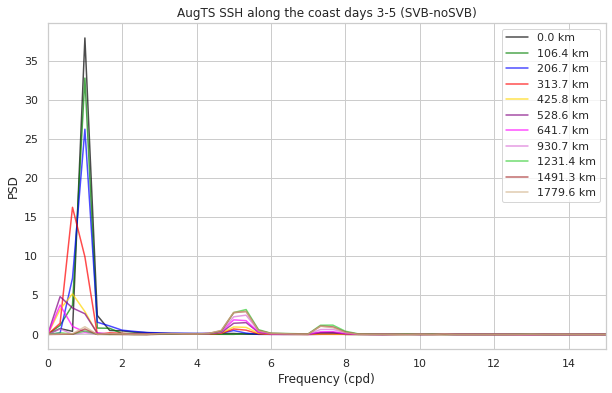

In [17]:
kind = 'linear'
title = 'AugTS SSH along the coast days 3-5 (SVB-noSVB)'
timeseries = (SVB.curtain_data.data-noSVB.curtain_data.data)*100
X = SVB.X[:]
fig, ax = plot_spectrogram(timeseries[288:,:],X, indices, colors, 
                           kind=kind, title=title, xlim=[0,15])

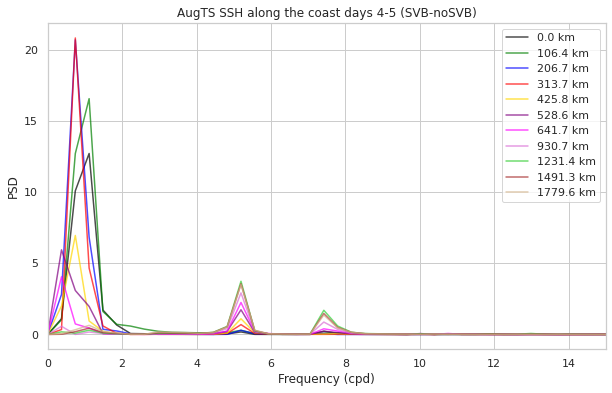

In [18]:
kind = 'linear'
title = 'AugTS SSH along the coast days 4-5 (SVB-noSVB)'
timeseries = (SVB.curtain_data.data-noSVB.curtain_data.data)*100
X = SVB.X[:]
fig, ax = plot_spectrogram(timeseries[332:,:],X, indices, colors, 
                           kind=kind, title=title, xlim=[0,15])